## 电影评论分类：Binary Classification Problem

In [1]:
import tensorflow as tf
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

/Users/dongdongdongdong/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [15]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((25000,), (25000,), (25000,), (25000,))

#### 👇由于限定为前10000个最常见的单词（num_words=10000），所以单词索引都不会超过10000：

In [16]:
max([max(sequence) for sequence in train_data])

9999

#### 👇将某条评论解码为单词：

In [23]:
word_index = imdb.get_word_index() # word_index 是一个将单词映射为整数索引的字典

reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]) # 键值颠倒，将整数索引映射为单词

decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[12]]) 
    # 将评论解码。注意，索引减去了3， 因为0、1、2是为 “padding”、“start of sequence”、“unknown” 分别保留的索引

In [24]:
decoded_review

"? i love cheesy horror flicks i don't care if the acting is sub par or whether the monsters look corny i liked this movie except for the ? feeling all the way from the beginning of the film to the very end look i don't need a 10 page ? or a sign with big letters explaining a plot to me but dark floors takes the what is this movie about thing to a whole new annoying level what is this movie about br br this isn't exceptionally scary or thrilling but if you have an hour and a half to kill and or you want to end up feeling frustrated and confused rent this winner"

#### 👇准备数据：将整数序列编码为二进制矩阵

In [29]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) # 创建一个形状为(len(sequences), dimension)的零矩阵
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [31]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [32]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [35]:
y_train[0]

1.0

#### 👇构建网络

In [38]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(10000,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1,  activation='sigmoid')])

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


#### 👇编译模型（配置优化器版本）

In [45]:
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
              loss=tf.keras.losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

#### 👇划分验证集

In [46]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#### 👇训练模型

In [49]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 167us/sample - loss: 0.5260 - acc: 0.7834 - val_loss: 0.4058 - val_acc: 0.8655
Epoch 2/20
15000/15000 [==============================] - 2s 118us/sample - loss: 0.3189 - acc: 0.9029 - val_loss: 0.3177 - val_acc: 0.8822
Epoch 3/20
15000/15000 [==============================] - 2s 115us/sample - loss: 0.2352 - acc: 0.9253 - val_loss: 0.2818 - val_acc: 0.8917
Epoch 4/20
15000/15000 [==============================] - 2s 113us/sample - loss: 0.1871 - acc: 0.9399 - val_loss: 0.2765 - val_acc: 0.8899
Epoch 5/20
15000/15000 [==============================] - 2s 110us/sample - loss: 0.1509 - acc: 0.9524 - val_loss: 0.3009 - val_acc: 0.8815
Epoch 6/20
15000/15000 [==============================] - 2s 115us/sample - loss: 0.1260 - acc: 0.9615 - val_loss: 0.2866 - val_acc: 0.8888
Epoch 7/20
15000/15000 [==============================] - 2s 112us/sample - loss: 0.1062 - acc: 0.9668 - val_l

In [52]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

#### 👇绘制 training loss 和 validation loss 曲线

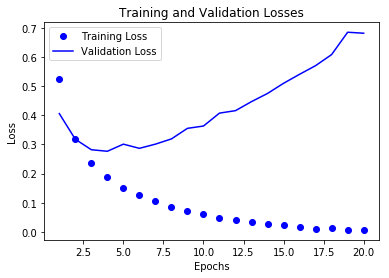

In [59]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### 👇绘制 training accuracy 和 validation accuracy 曲线

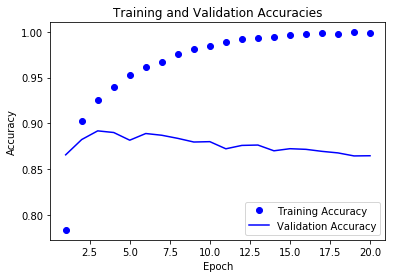

In [64]:
plt.clf() # 清空图像

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracies')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### 🔍：在 Validation Set 上，Accuracy 从第3个 epoch 开始下降，过拟合。

#### 👇从头开始重新训练一个模型

In [65]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(10000,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1,  activation='sigmoid')])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 67us/sample - loss: 0.4576 - accuracy: 0.8201
Epoch 2/4
25000/25000 [==============================] - 1s 59us/sample - loss: 0.2633 - accuracy: 0.9108
Epoch 3/4
25000/25000 [==============================] - 1s 59us/sample - loss: 0.2031 - accuracy: 0.9286
Epoch 4/4
25000/25000 [==============================] - 2s 81us/sample - loss: 0.2918 - accuracy: 0.8856


#### 👇使用训练好的网络在新数据集上生成预测结果

In [66]:
model.predict(x_test)

array([[0.1847243 ],
       [0.9999729 ],
       [0.9094711 ],
       ...,
       [0.1273562 ],
       [0.07859519],
       [0.56166947]], dtype=float32)